```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 

```

# Hierarchical Clustering
Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left. This technique operate on the simplest principle, which is data-point closer to base point will behave more similar compared to a data-point which is far from base point. 

## How does it work?
The results of hierarchical clustering can be shown using dendrogram. The dendrogram can be interpreted as:

<img src="images/hierarchical_clustering_01.png" alt="" style="width: 600px;"/>

At the bottom, we start with 25 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the dendrogram at which two clusters are merged represents the distance between two clusters in the data space.

The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

In the above example, the best choice of no. of clusters will be 4 as the red horizontal line in the dendrogram below covers maximum vertical distance AB.

<img src="images/hierarchical_clustering_02.png" alt="" style="width: 600px;"/>

Two important things that you should know about hierarchical clustering are:

- This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.
- The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters :
    - Euclidean distance: ||a-b||2 = √(Σ(ai-bi))
    - Squared Euclidean distance: ||a-b||22 = Σ((ai-bi)2)
    - Manhattan distance: ||a-b||1 = Σ|ai-bi|
    - Maximum distance:||a-b||INFINITY = maxi|ai-bi|
    - Mahalanobis distance: √((a-b)T S-1 (-b))   {where, s : covariance matrix}

## Steps to Perform Hierarchical Clustering
We merge the most similar points or clusters in hierarchical clustering. Now the question is – how do we decide which points are similar and which are not? Here’s one way to calculate similarity – Take the `distance between the centroids of these clusters`. The points having the least distance are referred to as similar points and we can merge them. We can refer to this as a **distance-based algorithm** as well (since we are calculating the distances between the clusters). In **hierarchical clustering**, we have a concept called a `proximity matrix`. This stores the distances between each point. Let’s take an example to understand this matrix as well as the steps to perform hierarchical clustering.

Suppose a teacher wants to divide her students into different groups. She has the marks scored by each student in an assignment and based on these marks, she wants to segment them into groups. There’s no fixed target here as to how many groups to have. Since the teacher does not know what type of students should be assigned to which group, it cannot be solved as a supervised learning problem. So, we will try to apply hierarchical clustering here and segment the students into different groups.

Let’s take a sample of 5 students:

<img src="images/hierarchical_clustering_03.png" alt="" style="width: 400px;"/>

### Create a Proximity Matrix
First, we will create a `proximity matrix` which will tell us the distance between each of these points. Since we are calculating the distance of each point from each of the other points, we will get a square matrix of shape n X n (where n is the number of observations).

Let’s make the 5 x 5 proximity matrix for our example:

<img src="images/hierarchical_clustering_04.png" alt="" style="width: 400px;"/>

The diagonal elements of this matrix will always be 0 as the distance of a point with itself is always 0. We will use the Euclidean distance formula to calculate the rest of the distances. So, let’s say we want to calculate the distance between point 1 and 2:
```
√(10-7)^2 = √9 = 3
```
Similarly, we can calculate all the distances and fill the proximity matrix.

### Steps to Perform Hierarchical Clustering
**Step 1:** First, we assign all the points to an individual cluster:

<img src="images/hierarchical_clustering_05.png" alt="" style="width: 400px;"/>

Different colors here represent different clusters. You can see that we have 5 different clusters for the 5 points in our data.

**Step 2:** Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance. We then update the proximity matrix:

<img src="images/hierarchical_clustering_06.png" alt="" style="width: 400px;"/>

Here, the smallest distance is 3 and hence we will merge point 1 and 2:

<img src="images/hierarchical_clustering_07.png" alt="" style="width: 400px;"/>

Let’s look at the updated clusters and accordingly update the proximity matrix:

<img src="images/hierarchical_clustering_08.png" alt="" style="width: 400px;"/>

Here, we have taken the maximum of the two marks (7, 10) to replace the marks for this cluster. Instead of the maximum, we can also take the minimum value or the average values as well. Now, we will again calculate the proximity matrix for these clusters:

<img src="images/hierarchical_clustering_09.png" alt="" style="width: 400px;"/>

**Step 3:** We will repeat step 2 until only a single cluster is left.

So, we will first look at the minimum distance in the proximity matrix and then merge the closest pair of clusters. We will get the merged clusters as shown below after repeating these steps:

<img src="images/hierarchical_clustering_10.png" alt="" style="width: 400px;"/>

We started with 5 clusters and finally have a single cluster. This is how `agglomerative hierarchical clustering` works. But the burning question still remains – how do we decide the number of clusters?

### Choose the Number of Clusters in Hierarchical Clustering
To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a `Dendrogram`. A dendrogram is a tree-like diagram that records the sequences of merges or splits. 

Let’s get back to our teacher-student example. Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. Let’s see how a dendrogram looks like:

<img src="images/hierarchical_clustering_11.png" alt="" style="width: 400px;"/>

We have the samples of the dataset on the x-axis and the distance on the y-axis. Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Let’s build the dendrogram for our example:

<img src="images/hierarchical_clustering_10.png" alt="" style="width: 400px;"/>

Take a moment to process the above image. We started by merging sample 1 and 2 and the distance between these two samples was 3 (refer to the first proximity matrix in the previous section). Let’s plot this in the dendrogram:

<img src="images/hierarchical_clustering_12.png" alt="" style="width: 400px;"/>

Here, we can see that we have merged sample 1 and 2. The vertical line represents the distance between these samples. Similarly, we plot all the steps where we merged the clusters and finally, we get a dendrogram like this:

<img src="images/hierarchical_clustering_13.png" alt="" style="width: 400px;"/>

We can clearly visualize the steps of hierarchical clustering. `More the distance of the vertical lines in the dendrogram, more the distance between those clusters`.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 12 and draw a horizontal line:

<img src="images/hierarchical_clustering_14.png" alt="" style="width: 400px;"/>

`The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold`. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering.


## Implementation
See 3000 Clustering algorithms

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset,
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

Let’s explore the data first and then `apply Hierarchical Clustering to segment the clients`.

In [4]:
df = get_dataset('wholesale_customers_data')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. `Our aim is to make clusters from this data that can segment similar clients together`. We will, of course, use `Hierarchical Clustering` for this problem.

But before applying Hierarchical Clustering, we have to `normalize the data` so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table). So, let’s first normalize the data and bring all the variables to the same scale:

In [5]:
from sklearn.preprocessing import normalize

df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the `dendrogram` to help us decide the number of clusters for this particular problem:

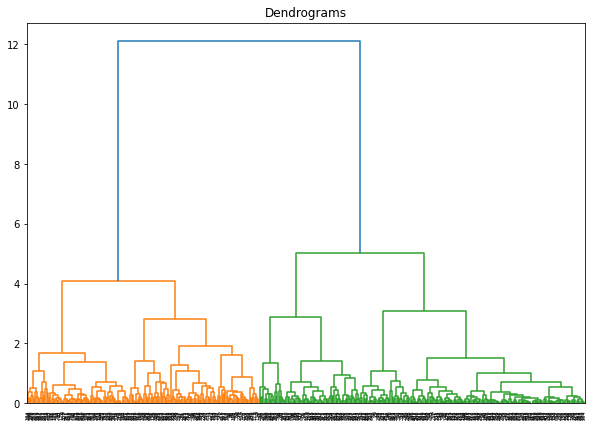

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

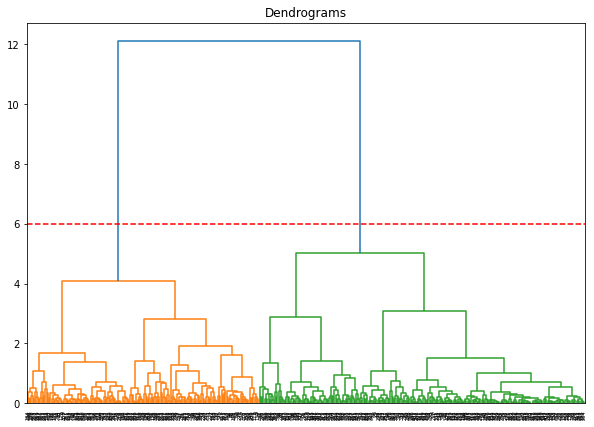

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--');

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

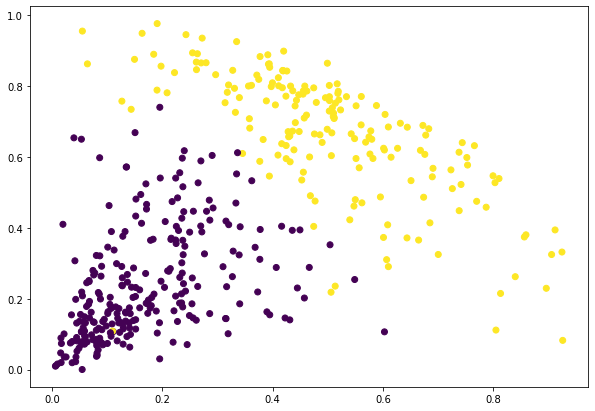

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['Milk'], df_scaled['Grocery'], c=cluster.labels_) 

Hierarchical clustering is a super useful way of segmenting observations. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means.